In [62]:
#Run preprocessing Notebook
#To see the sets in preprocessing please view preprocessing notebook
%run HPP_Preprocessing.ipynb
#The variables we would use from this notebook are featuresNormalized (contains all features normalized) & dfp (normalized dataframe)


A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name          numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                                        0
Yearendin

finished preprocessing.....


In [63]:
featuresForKMeans = [item for item in featuresNormalized if not item.startswith('Yearending')]
print("the features for kmeans model are :\n")
print(featuresForKMeans)
#I am expecting all coloumns ending with _n other than the label because kmeans is unsupervised

the features for kmeans model are :

['IndexofMultipleDeprivationIMDScore_n', 'IncomeScorerate_n', 'EmploymentScorerate_n', 'EducationSkillsandTrainingScore_n', 'HealthDeprivationandDisabilityScore_n', 'CrimeScore_n', 'BarrierstoHousingandServicesScore_n', 'LivingEnvironmentScore_n', 'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n', 'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n', 'ChildrenandYoungPeopleSubdomainScore_n', 'AdultSkillsSubdomainScore_n', 'GeographicalBarriersSubdomainScore_n', 'WiderBarriersSubdomainScore_n', 'IndoorsSubdomainScore_n', 'OutdoorsSubdomainScore_n']


In [64]:
#Selecting the optimal K we use elbow method
#This function helps to produce the elbow plot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def evaluate_k_means_elbow_method(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=80)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Find the elbow point
    deltas = np.diff(inertias, 2)
    elbow_index = np.argmax(deltas) + 2  # Add 2 due to zero indexing

    # Generate the elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.plot(elbow_index, inertias[elbow_index - 1], marker='o', markersize=8, label='Elbow Point', color='red')
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('WCSS (Within-Cluster Sum of Square)')
    ax.grid(True)
    ax.legend()
    de = pd.DataFrame({'Number of Clusters (K)': means, 'WCSS (Within-Cluster Sum of Square)': inertias})
    print(de)
    plt.show()

    Number of Clusters (K)  WCSS (Within-Cluster Sum of Square)
0                        1                          8608.445541
1                        2                          5579.659700
2                        3                          4821.858063
3                        4                          4266.843972
4                        5                          3737.796224
5                        6                          3484.645857
6                        7                          3271.678070
7                        8                          3099.099081
8                        9                          2950.640999
9                       10                          2846.648690
10                      11                          2757.158056
11                      12                          2678.913420
12                      13                          2605.969279
13                      14                          2536.944584
14                      15              

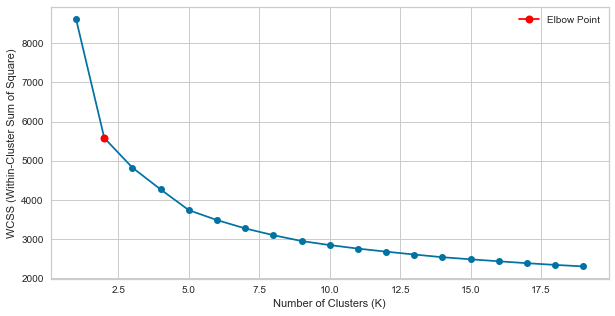

In [7]:
#with 1-20 clusters , drawing the elbow plot
#The graph inidcates the elbow point is at k=2 , but we notice that the line starts to straighten out at k= 5.
evaluate_k_means_elbow_method(dfp[featuresForKMeans],20)

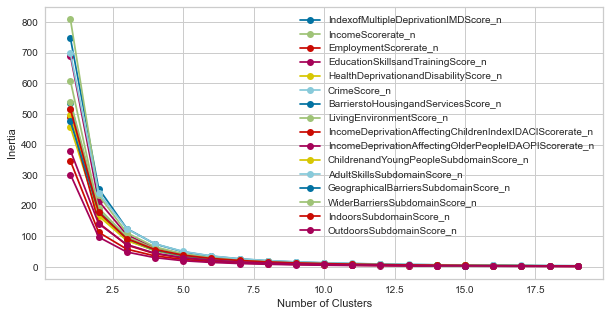

In [10]:
#we matain a random state of 80 through out this evlaution.
#We make further analysis by making an eblow plot for each features
#we notice that the k= 4 seems more like the elnow point
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def optimise_k_means(data, max_k, ax=None):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=80)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Plot the elbow curve on the given axis (or create a new one)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-', label=data.columns[0])
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    ax.grid(True)


# Define the list of column names for the variables
columns = featuresForKMeans

# Create a single plot to display all elbow curves
fig, ax = plt.subplots(figsize=(10, 5))

# Iterate over each column name
for column in columns:
    ds = dfp[[column]]
    optimise_k_means(ds, 20, ax)

ax.legend()
plt.show()


In [35]:
#Next we try to Optimize the K-means Clustering using Silhouette
#From the graph we notice we have a drop at k= 2 but at k=5 we have another peak point before we start seeing a constant decline
#from the evlaution using a silhoutte score, the model has a good score at k = 5.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def optimise_k_means_sil(data, max_k):
    sil_score = []
    cluster_list = []

    for k in range(2, max_k):  # Changed the range to start from 2
        cluster_list.append(k)
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=80)
        preds = kmeans.fit_predict(data)  # Removed unnecessary parentheses around data
        score = silhouette_score(data, preds)
        sil_score.append(score)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(cluster_list, sil_score, 'o-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Optimization of K-means Clustering using Silhouette')
    plt.show()


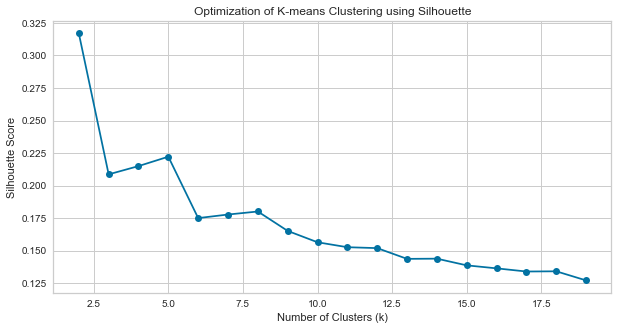

In [36]:
optimise_k_means_sil(dfp[featuresForKMeans], 20)

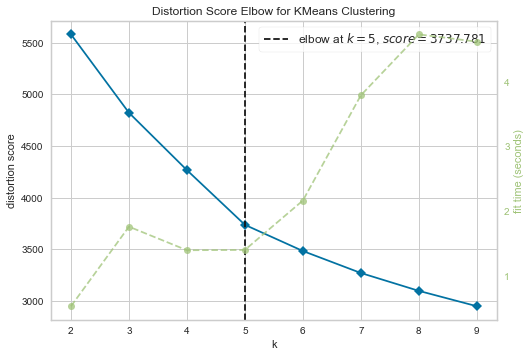

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
#install yellowbrick to vizualize the Elbow curve
#!pip install yellowbrick
#From the graph we compare the elbow plot and silhoutee score
#we noticed that they intersect between k =5 & k =6

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


X = dfp[featuresForKMeans]

# Instantiate the clustering model and visualizer
km = KMeans(n_clusters=10,n_init=10,random_state=80)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

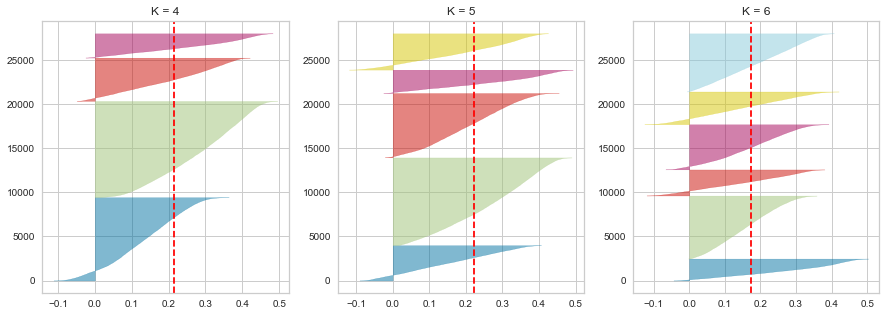

In [17]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

X = dfp[featuresForKMeans]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, n_clusters in enumerate([4, 5, 6]):
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=n_clusters, n_init=10, random_state=80)

    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i])  # Corrected the indexing
    visualizer.fit(X)

    # Add label indicating the value of K
    ax[i].set_title(f"K = {n_clusters}")

plt.show()


In [65]:
#Building the KMeans Model with K= 6
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, n_init=10, random_state=80)
#Fit the model with the features only
kmeans.fit(dfp[featuresForKMeans])

KMeans(n_clusters=6, random_state=80)

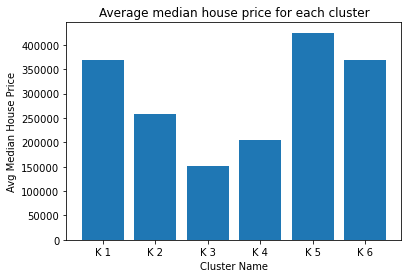

In [98]:
#Lets take a step foward to visualize the cluster and see the characteristics of each cluster
dfn = dfp
dfn['kmeans_5'] = kmeans.labels_
c = []
c = featuresForKMeans
columns_to_append = ["YearendingDec2021","YearendingDec2021_n","kmeans_5"]

for column in columns_to_append:
    if column not in c:
        c.append(column)
        
#print(featuresForKMeans)

#First we need to get all clusters
import numpy as np
clusterIndex = np.sort(dfn["kmeans_5"].unique())
clusterName = []
results = []
for cl in clusterIndex:
    dtTemp = dfn[dfn["kmeans_5"] == cl]
    results.append(dtTemp['YearendingDec2021'].median())
    clusterName.append("K " + str(cl+1))

x_axis = clusterName
y_axis = results

plt.bar(x_axis, y_axis)
plt.title('Average median house price for each cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Avg Median House Price')
plt.show()

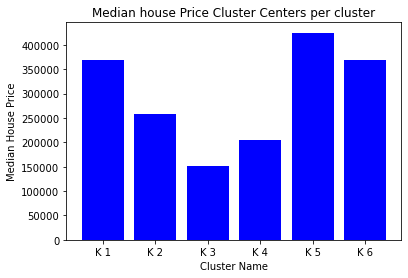

,0,1,2,3,4,5
IndexofMultipleDeprivationIMDScore_n,0.159179,0.136007,0.486851,0.279406,0.227393,0.060200
IncomeScorerate_n,0.121737,0.160974,0.514093,0.316288,0.230532,0.077838
EmploymentScorerate_n,0.112308,0.148611,0.398688,0.260021,0.165105,0.083774
EducationSkillsandTrainingScore_n,0.114220,0.151735,0.474692,0.326071,0.113013,0.054251
HealthDeprivationandDisabilityScore_n,0.404495,0.485308,0.684988,0.585327,0.508227,0.374928
CrimeScore_n,0.358958,0.441743,0.631274,0.517267,0.583653,0.355763
BarrierstoHousingandServicesScore_n,0.610486,0.233351,0.348415,0.303499,0.385721,0.297872
LivingEnvironmentScore_n,0.349080,0.161221,0.374890,0.191441,0.431425,0.093592
IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n,0.097268,0.133074,0.423888,0.273489,0.215665,0.061437
IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n,0.088283,0.119833,0.331293,0.208288,0.221598,0.064245


In [109]:
dfn = dfn[c]
dfn.head()
#leats visualize the average price of house for each cluster
#First we need to get all clusters
import numpy as np
clusterIndex = np.sort(dfn["kmeans_5"].unique())
clusterName = []
averageMedianHouseOfClusters = []
results = []
for cl in clusterIndex:
    dtTemp = dfn[dfn["kmeans_5"] == cl]
    results.append(dtTemp['YearendingDec2021'].median())
    averageMedianHouseOfClusters.append(dtTemp['YearendingDec2021_n'].median())
    clusterName.append("K " + str(cl+1))

x_axis = clusterName
y_axis = results

plt.bar(x_axis, y_axis,color='blue')
plt.title('Median house Price Cluster Centers per cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Median House Price')
plt.show()

s = ['IndexofMultipleDeprivationIMDScore_n', 'IncomeScorerate_n', 'EmploymentScorerate_n', 'EducationSkillsandTrainingScore_n', 'HealthDeprivationandDisabilityScore_n', 'CrimeScore_n', 'BarrierstoHousingandServicesScore_n', 'LivingEnvironmentScore_n', 'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n', 'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n', 'ChildrenandYoungPeopleSubdomainScore_n', 'AdultSkillsSubdomainScore_n', 'GeographicalBarriersSubdomainScore_n', 'WiderBarriersSubdomainScore_n', 'IndoorsSubdomainScore_n', 'OutdoorsSubdomainScore_n']
pd.DataFrame(kmeans.cluster_centers_, columns=s).T

In [100]:
averageMedianHouseOfClusters

[0.06999187322226737,
 0.047236895570906136,
 0.02568823648923202,
 0.03646891507517269,
 0.08116619260463226,
 0.06973791141812272]

In [70]:
dfn.head()

,IndexofMultipleDeprivationIMDScore_n,IncomeScorerate_n,EmploymentScorerate_n,EducationSkillsandTrainingScore_n,HealthDeprivationandDisabilityScore_n,CrimeScore_n,BarrierstoHousingandServicesScore_n,LivingEnvironmentScore_n,IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n,IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n,ChildrenandYoungPeopleSubdomainScore_n,AdultSkillsSubdomainScore_n,GeographicalBarriersSubdomainScore_n,WiderBarriersSubdomainScore_n,IndoorsSubdomainScore_n,OutdoorsSubdomainScore_n,YearendingDec2021,kmeans_5,YearendingDec2021_n
0,0.060636,0.010733,0.019504,0.000151,0.218556,0.186581,0.433882,0.368569,0.003505,0.012333,0.115658,0.001575,0.424603,0.740624,0.593059,0.714792,840000.0,5,0.165482
1,0.062720,0.012522,0.023050,0.000342,0.216543,0.178866,0.421269,0.396509,0.002336,0.023638,0.139934,0.004724,0.428737,0.730098,0.649082,0.658772,817500.0,5,0.160910
2,0.207014,0.178891,0.148936,0.096549,0.565366,0.305346,0.510711,0.517012,0.176402,0.157246,0.511011,0.174803,0.398313,0.805925,0.634921,0.815771,540000.0,4,0.104531
3,0.239796,0.228980,0.159574,0.145928,0.455235,0.616254,0.638722,0.325383,0.177570,0.208633,0.426738,0.462992,0.469081,0.840214,0.618892,0.628138,410000.0,4,0.078119
4,0.330392,0.343470,0.131206,0.133385,0.537175,0.681737,0.825765,0.408579,0.365654,0.500514,0.523669,0.310236,0.335483,0.990230,0.666355,0.637782,200000.0,4,0.035453


In [102]:
import numpy as np
elementsOfDeprivation = ['IndexofMultipleDeprivationIMDScore_n', 'IncomeScorerate_n', 'EmploymentScorerate_n',
          'EducationSkillsandTrainingScore_n', 'HealthDeprivationandDisabilityScore_n', 'CrimeScore_n',
          'BarrierstoHousingandServicesScore_n', 'LivingEnvironmentScore_n',
          'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n',
          'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n', 'ChildrenandYoungPeopleSubdomainScore_n',
          'AdultSkillsSubdomainScore_n', 'GeographicalBarriersSubdomainScore_n', 'WiderBarriersSubdomainScore_n',
          'IndoorsSubdomainScore_n', 'OutdoorsSubdomainScore_n']

cl = np.sort(dfn["kmeans_5"].unique())
my_dict = {}
for cl in clusterIndex:
    dtTemp = dfn[dfn["kmeans_5"] == cl]
    elements = []
    for element in elementsOfDeprivation:
        avgElementOfDeprivation = dtTemp[element].median()
        elements.append(avgElementOfDeprivation)
        #print("The avg "+element+" for cluster "+str(cl)+" is "+str(avgElementOfDeprivation))
        
    my_dict["K"+str(cl+1)] = elements
    
#print(my_dict)
        

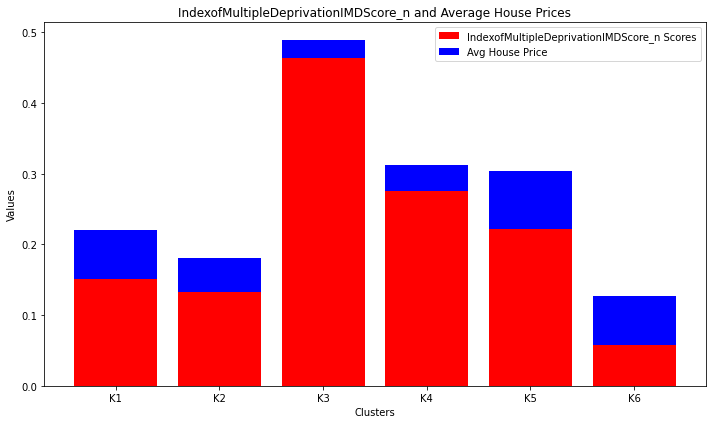

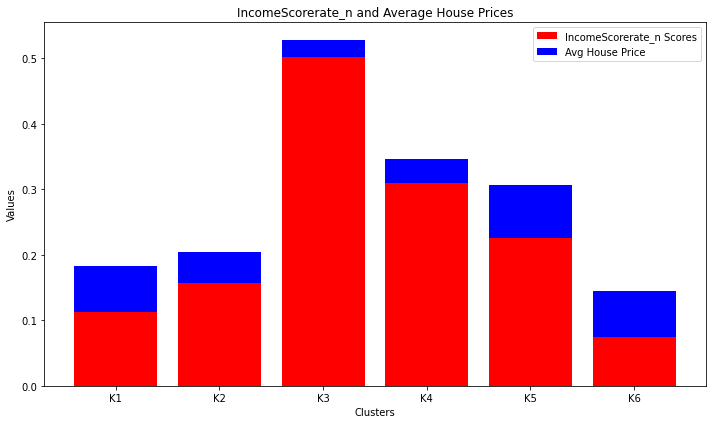

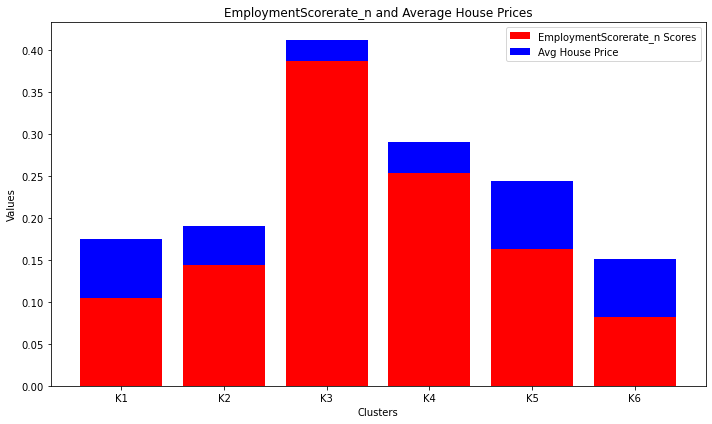

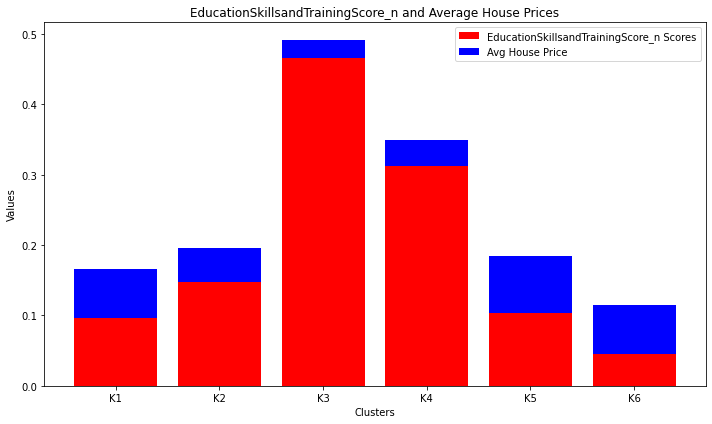

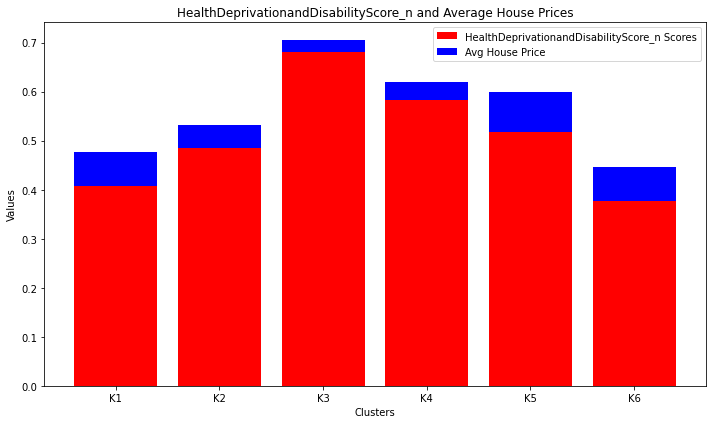

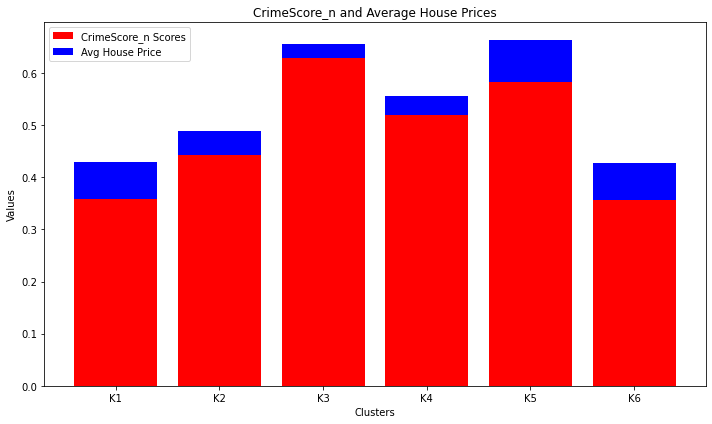

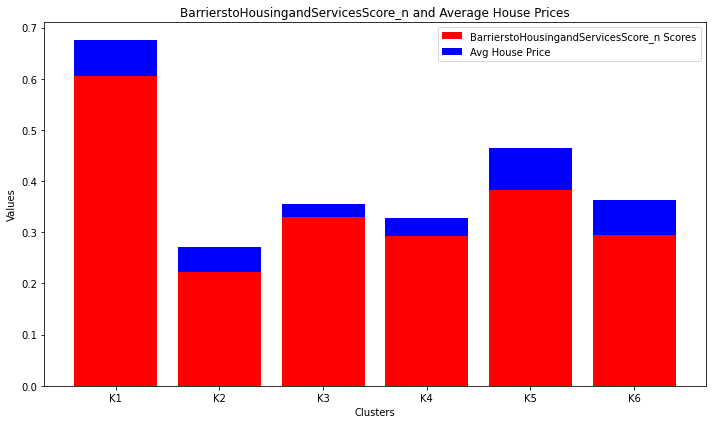

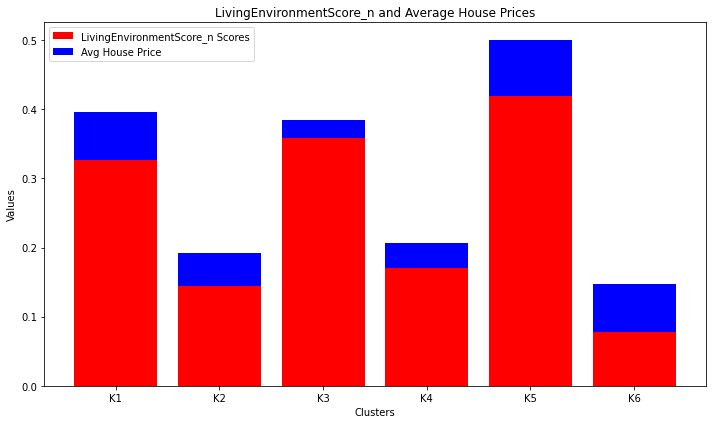

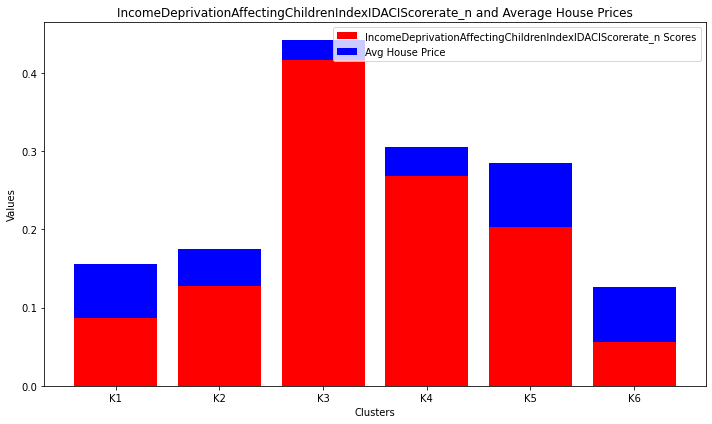

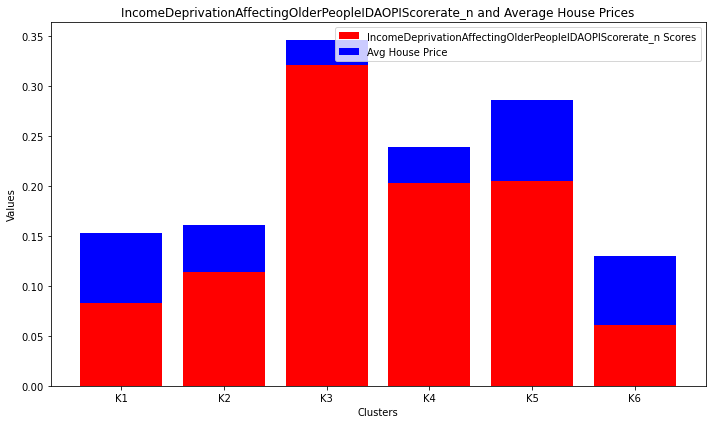

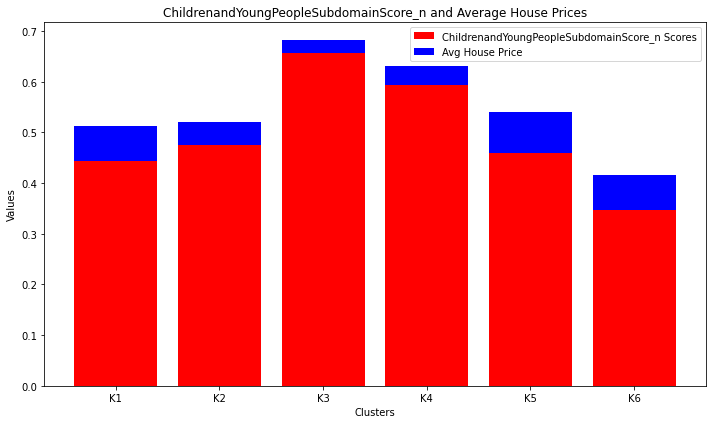

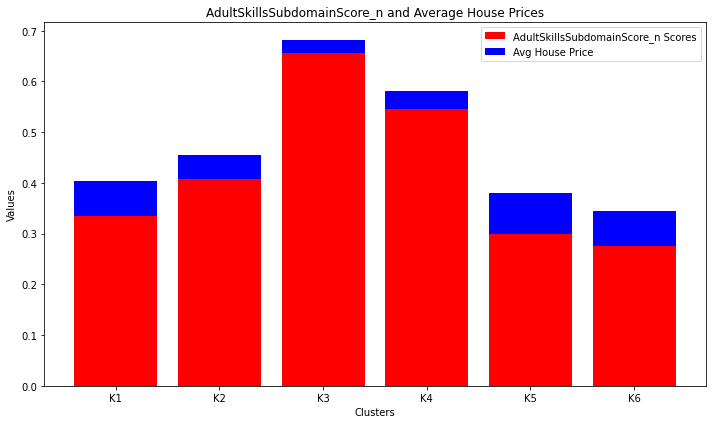

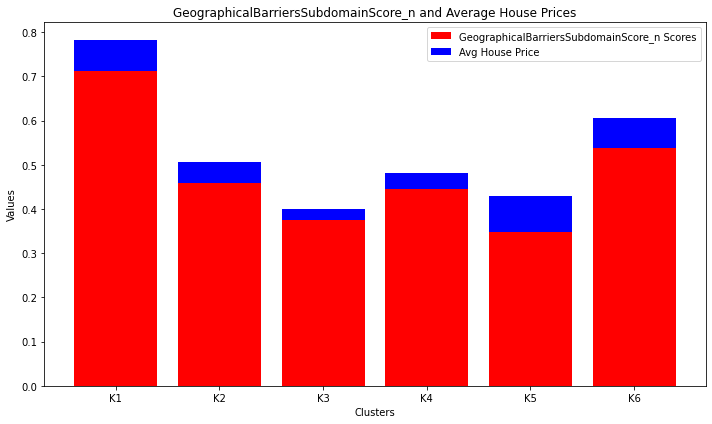

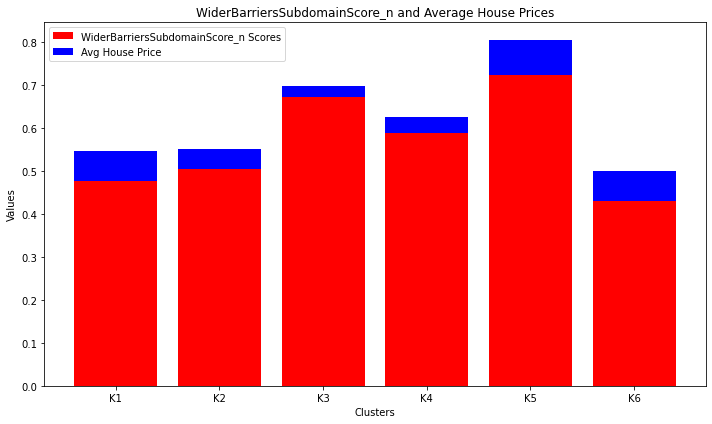

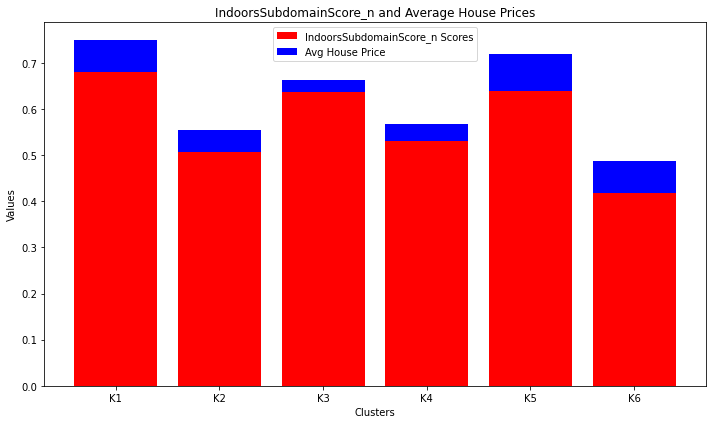

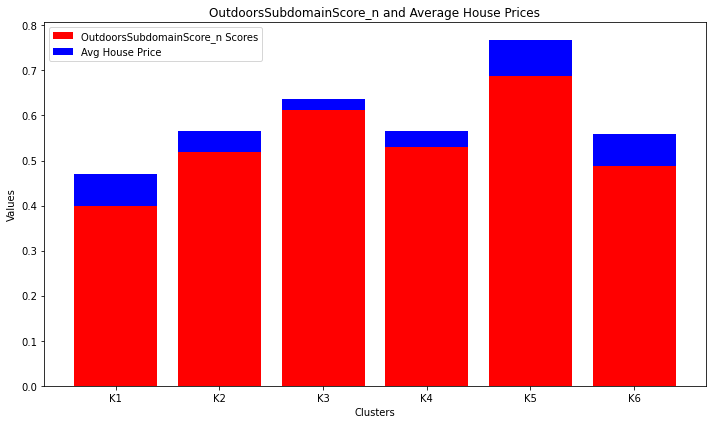

In [107]:
import matplotlib.pyplot as plt

positions = [0,1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15]

for pos in positions:
    deprivation_index_name = elementsOfDeprivation[pos]
    clusters = list(my_dict.keys())
    elementScores = []

    # Getting the data for the specific deprivation index
    for k in clusters:
        score = my_dict[k][pos]
        elementScores.append(score)

    # Plotting the stacked bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(clusters, elementScores,color='red', label=deprivation_index_name + ' Scores')
    plt.bar(clusters, averageMedianHouseOfClusters,color='blue', bottom=elementScores, label='Avg House Price')

    plt.xlabel('Clusters')
    plt.ylabel('Values')
    plt.title(deprivation_index_name + ' and Average House Prices')
    plt.legend()
    plt.tight_layout()
    plt.show()


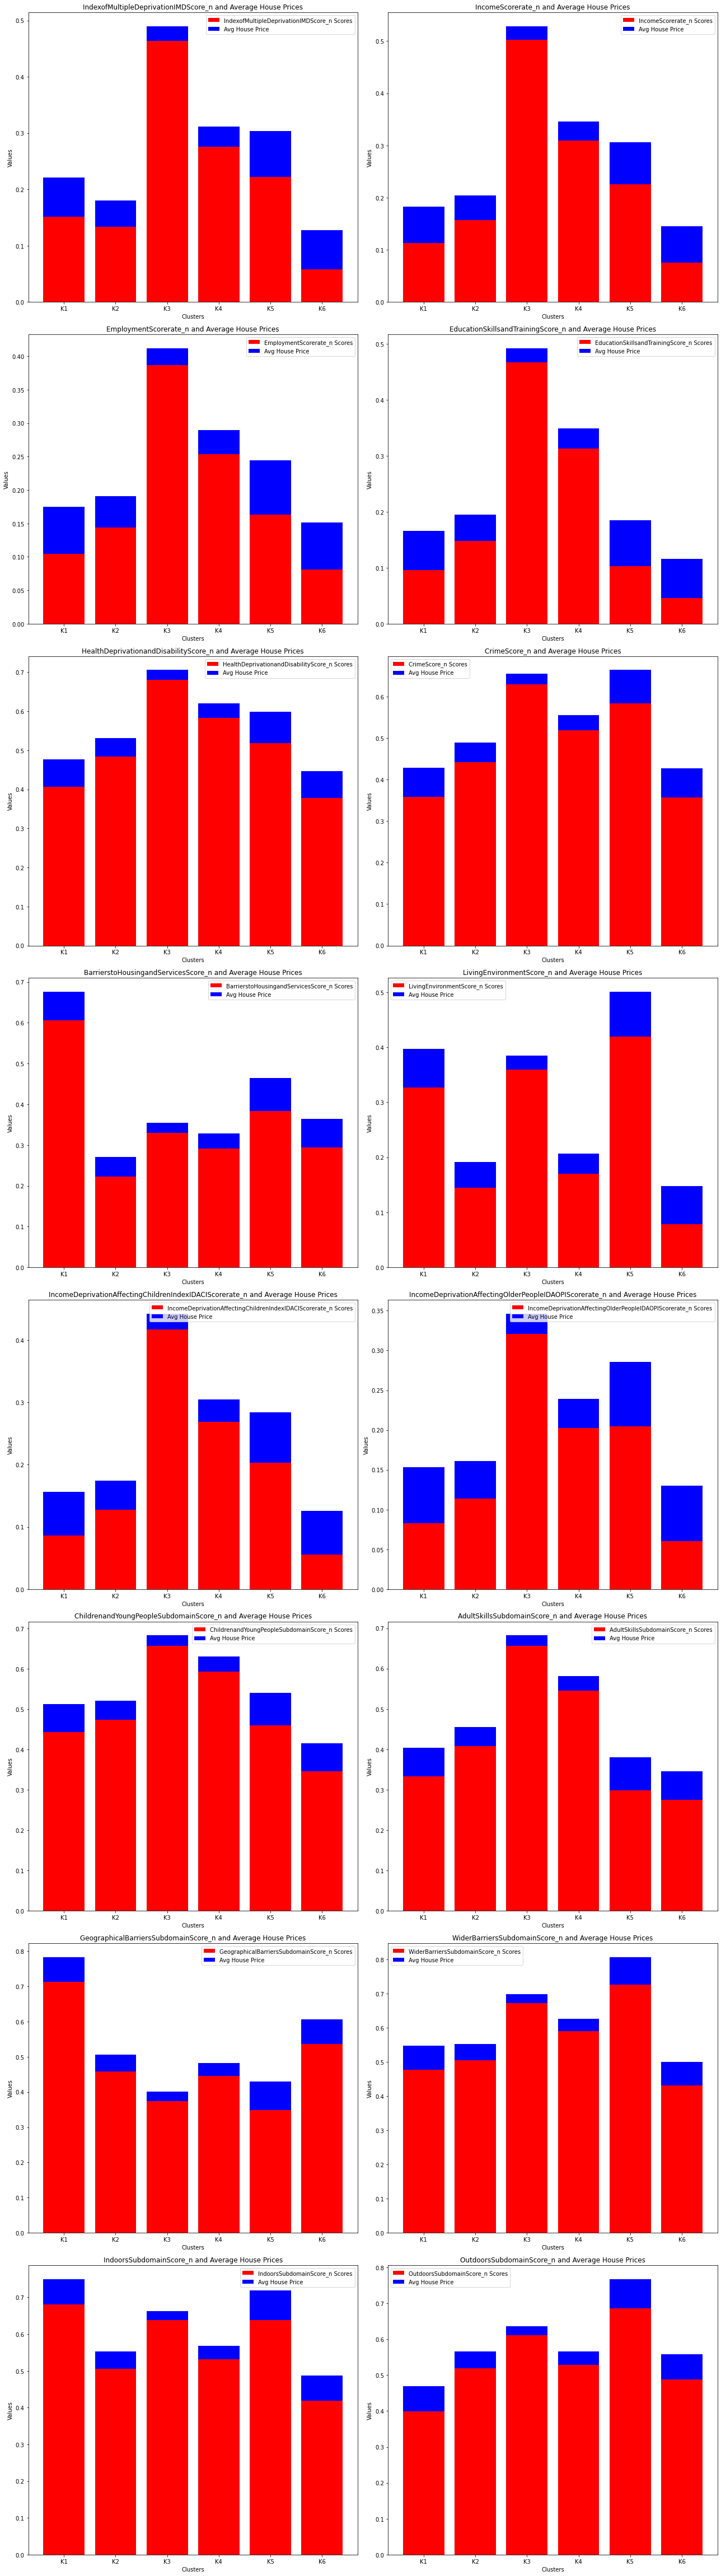

In [106]:
import matplotlib.pyplot as plt

positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Create a grid of subplots with 2 columns
num_plots = len(positions)
num_rows = int((num_plots + 1) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(18, 8*num_rows))  # Adjust the figsize as per your preference

# Flatten the axs array if necessary
if num_plots % 2 != 0:
    axs[-1, -1].axis('off')  # If odd number of plots, remove the last subplot

for i, pos in enumerate(positions):
    deprivation_index_name = elementsOfDeprivation[pos]
    clusters = list(my_dict.keys())
    elementScores = []

    # Getting the data for the specific deprivation index
    for k in clusters:
        score = my_dict[k][pos]
        elementScores.append(score)

    # Plotting the stacked bar chart in the current subplot
    ax = axs[i // 2, i % 2]
    ax.bar(clusters, elementScores, color='red', label=deprivation_index_name + ' Scores')
    ax.bar(clusters, averageMedianHouseOfClusters, color='blue', bottom=elementScores, label='Avg House Price')

    ax.set_xlabel('Clusters')
    ax.set_ylabel('Values')
    ax.set_title(deprivation_index_name + ' and Average House Prices')
    ax.legend()

# To ensure all subplots are visible properly
plt.tight_layout()
plt.show()
